In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_excel('output_data_2020.xlsx', index_col=None)

In [15]:
del df['Unnamed: 0']

In [20]:
df.columns

Index(['Date', 'Kurs fixing'], dtype='object')

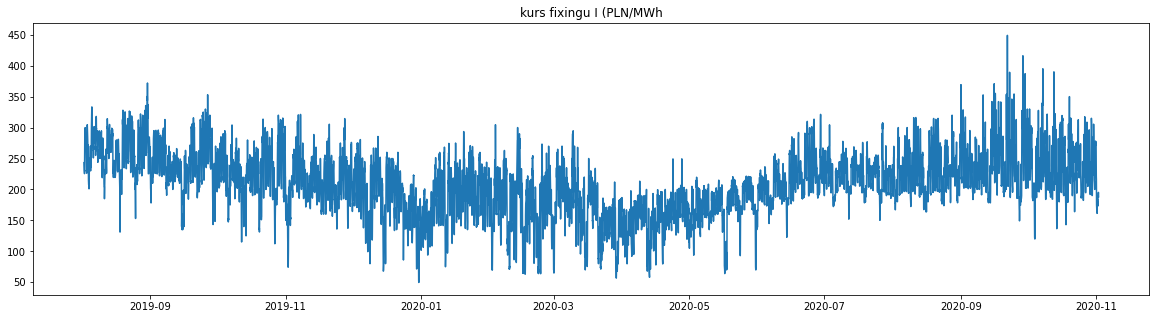

In [21]:
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['Kurs fixing'])
plt.title("kurs fixingu I (PLN/MWh")
params = {"ytick.color" : "w",
          "xtick.color" : "white",
          "axes.labelcolor" : "white",
          "axes.edgecolor" : "white"
        }
plt.rcParams.update(params)
plt.show()

#### ARIMA Model (Auto Regression)

In [23]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [25]:
df

,Date,Kurs fixing
0,2019-08-02 01:00:00,243.28
1,2019-08-02 02:00:00,236.99
2,2019-08-02 03:00:00,235.00
3,2019-08-02 04:00:00,230.00
4,2019-08-02 05:00:00,228.95
...,...,...
10986,2020-11-01 20:00:00,189.75
10987,2020-11-01 21:00:00,190.00
10988,2020-11-01 22:00:00,195.26
10989,2020-11-01 23:00:00,192.88


In [26]:
len(df)/24

457.9583333333333

In [27]:
model = AutoReg(df['Kurs fixing'], 24)
model_fit = model.fit()

In [32]:
train_df = df.iloc[:9000]
test_df = df.iloc[9000:]

train_model = AutoReg(train_df['Kurs fixing'], 450).fit(cov_type="HCO")
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start=start, end=end, dynamic=True)
ax = test_df.plot(ax=ax)
ax = prediction.plot(ax=ax)

ValueError: cov_type not recognized. See docstring for available options and spelling